<a href="https://colab.research.google.com/github/NuryaFahruRosyidin2406/Dicoding_Learn-ML/blob/main/Second_project_modeling_for_time_series_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
# Dataset yang digunakan adalah cuaca kota Delhi pada tahun 2013 sampai 2017
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [115]:
# url = 'https://github.com/NuryaFahruRosyidin2406/Dicoding_Learn-ML/raw/main/Dataset/Time%20Series%20with%20LSTM/DailyDelhiClimateTrain.csv'

data_train = pd.read_csv('/content/Aquifer_Petrignano.csv')
# data_train = pd.read_csv(url)
data_train

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [116]:
data_train.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [117]:
# Mengecek apakah ada nilai yang hilang dari dataset menggunakan fungsi isnull().
data_train.isnull().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [118]:
# Drop Data
data = data_train[data_train.Temperature_Petrignano.notna()].reset_index(drop=True)
data

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,01/01/2009,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1,02/01/2009,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2,03/01/2009,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
3,04/01/2009,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3
...,...,...,...,...,...,...,...,...
4194,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
4195,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
4196,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
4197,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [119]:
# Mengecek apakah ada nilai yang hilang dari dataset menggunakan fungsi isnull().
data.isnull().sum()

Date                                     0
Rainfall_Bastia_Umbra                    0
Depth_to_Groundwater_P24                39
Depth_to_Groundwater_P25                27
Temperature_Bastia_Umbra                 0
Temperature_Petrignano                   0
Volume_C10_Petrignano                    1
Hydrometry_Fiume_Chiascio_Petrignano     0
dtype: int64

In [120]:
# Hilangkan beberapa kolom target, lalu fokus ke salah satu target saja
data = data.drop(['Rainfall_Bastia_Umbra',
                  'Depth_to_Groundwater_P24',
                  'Depth_to_Groundwater_P25',
                  'Volume_C10_Petrignano',
                  'Hydrometry_Fiume_Chiascio_Petrignano'], axis=1)
data

,Date,Temperature_Bastia_Umbra,Temperature_Petrignano
0,01/01/2009,5.2,4.9
1,02/01/2009,2.3,2.5
2,03/01/2009,4.4,3.9
3,04/01/2009,0.8,0.8
4,05/01/2009,-1.9,-2.1
...,...,...,...
4194,26/06/2020,25.7,24.5
4195,27/06/2020,26.2,25.0
4196,28/06/2020,26.9,25.7
4197,29/06/2020,26.9,26.0


In [121]:
# Mengecek apakah ada nilai yang hilang dari dataset menggunakan fungsi isnull().
data.isnull().sum()

Date                        0
Temperature_Bastia_Umbra    0
Temperature_Petrignano      0
dtype: int64

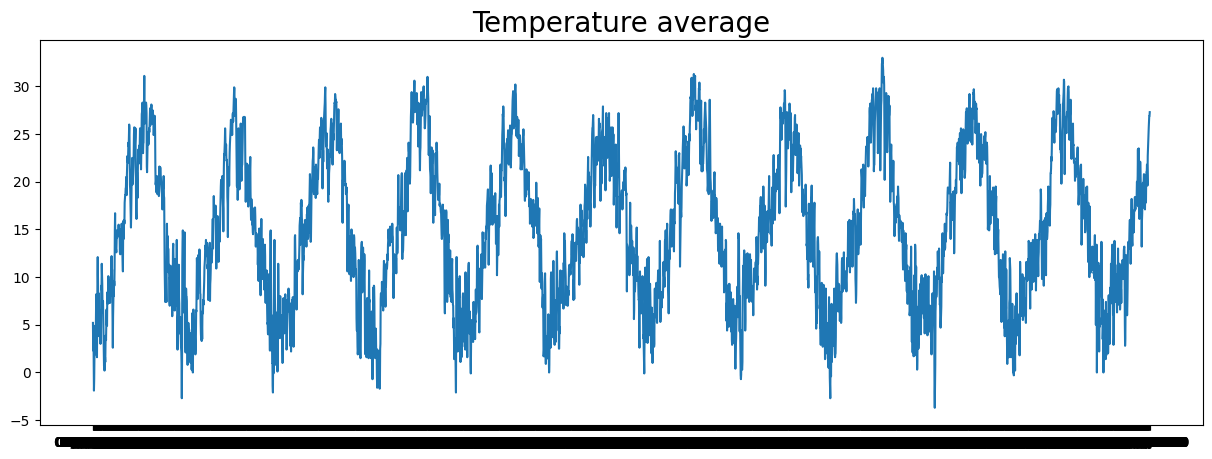

In [122]:
dates = data['Date'].values
temp  = data['Temperature_Bastia_Umbra'].values


plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

In [123]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp, dates, test_size = 0.2, random_state = 0, shuffle = False)
print(len(x_train), len(x_test))

3359 840


In [125]:
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=5000)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [126]:
MAE = (data['Temperature_Bastia_Umbra'].max() - data['Temperature_Bastia_Umbra'].min()) * 10/100
print(MAE)

3.67


In [127]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < 3.67):
      print("\nMAE telah mencapai target")
      self.model.stop_training = True

callbacks = myCallback()

In [128]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
# history = model.fit(train_set, epochs=100, callbacks=[callbacks])
history = model.fit(train_set, epochs=100,
                    validation_data = val_set, verbose = 2, callbacks=[callbacks])

Epoch 1/100
33/33 - 14s - loss: 14.4377 - mae: 14.9355 - val_loss: 15.2108 - val_mae: 15.7082 - 14s/epoch - 412ms/step
Epoch 2/100
33/33 - 4s - loss: 14.2798 - mae: 14.7774 - val_loss: 15.0767 - val_mae: 15.5744 - 4s/epoch - 128ms/step
Epoch 3/100
33/33 - 6s - loss: 14.1307 - mae: 14.6283 - val_loss: 14.9077 - val_mae: 15.4059 - 6s/epoch - 190ms/step
Epoch 4/100
33/33 - 4s - loss: 13.9569 - mae: 14.4543 - val_loss: 14.7197 - val_mae: 15.2183 - 4s/epoch - 126ms/step
Epoch 5/100
33/33 - 6s - loss: 13.7583 - mae: 14.2556 - val_loss: 14.4979 - val_mae: 14.9964 - 6s/epoch - 180ms/step
Epoch 6/100
33/33 - 5s - loss: 13.5157 - mae: 14.0120 - val_loss: 14.2179 - val_mae: 14.7160 - 5s/epoch - 146ms/step
Epoch 7/100
33/33 - 5s - loss: 13.2070 - mae: 13.7024 - val_loss: 13.8595 - val_mae: 14.3553 - 5s/epoch - 152ms/step
Epoch 8/100
33/33 - 6s - loss: 12.8045 - mae: 13.2980 - val_loss: 13.3813 - val_mae: 13.8744 - 6s/epoch - 167ms/step
Epoch 9/100
33/33 - 6s - loss: 12.2595 - mae: 12.7530 - val_lo